[*********************100%***********************]  1 of 1 completed


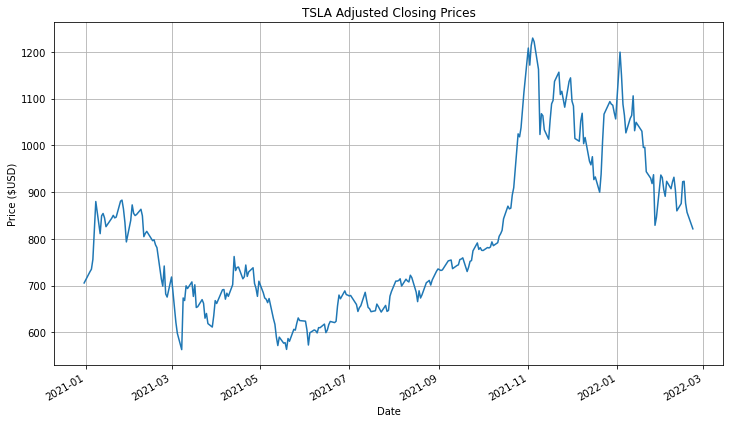

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

start = dt.datetime(2021,1,1)
end = dt.datetime(2022,3,1)

data = yf.download('TSLA', interval='1d', start='2021-01-01')
data['Adj Close'].plot(figsize=(12,7))
plt.title('TSLA Adjusted Closing Prices')
plt.ylabel('Price ($USD)')
plt.grid()
plt.show();

### Creating a function called `Trend_Following_Strategy()`

[*********************100%***********************]  1 of 1 completed


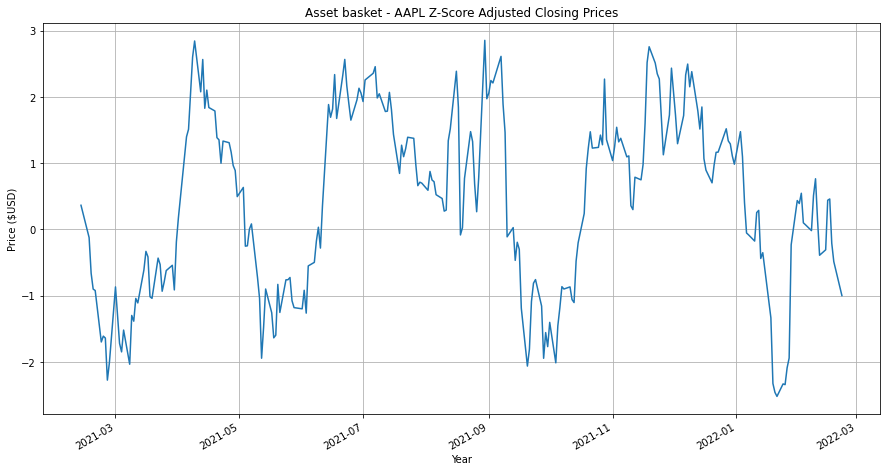

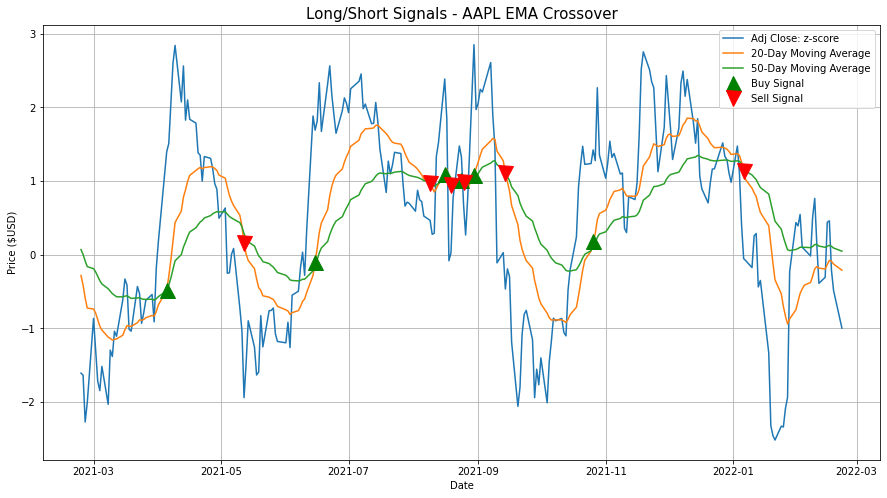

[*********************100%***********************]  1 of 1 completed


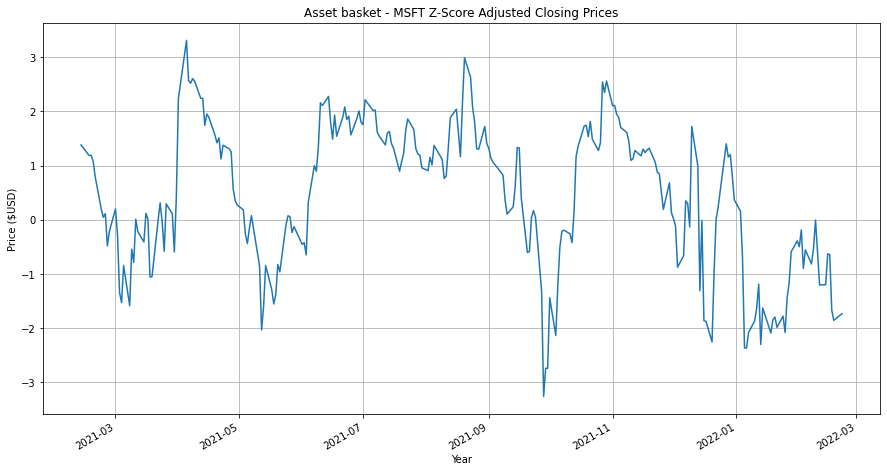

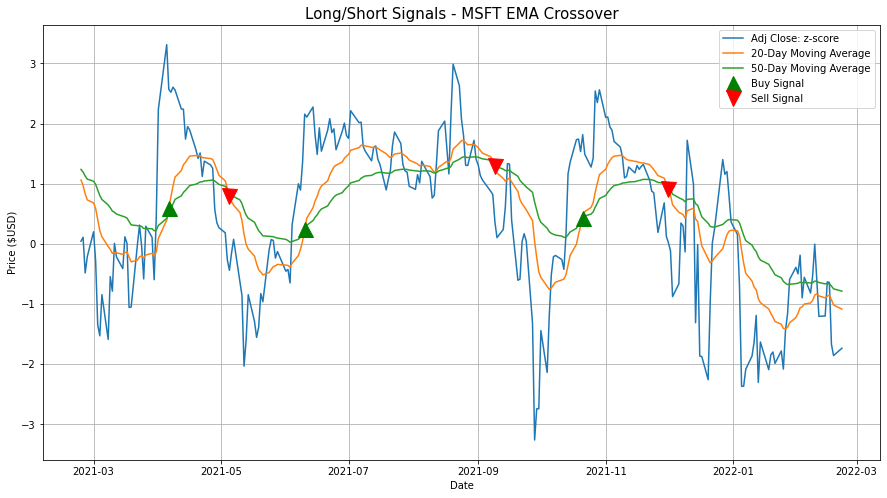

[*********************100%***********************]  1 of 1 completed


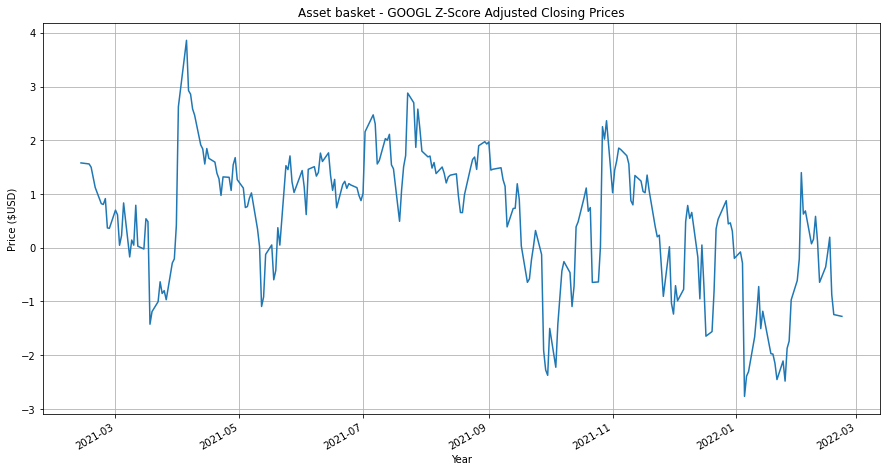

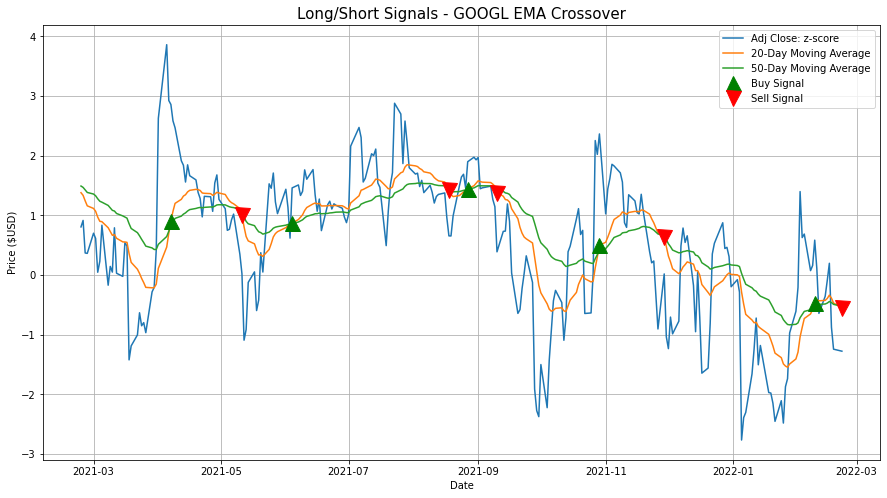

[*********************100%***********************]  1 of 1 completed


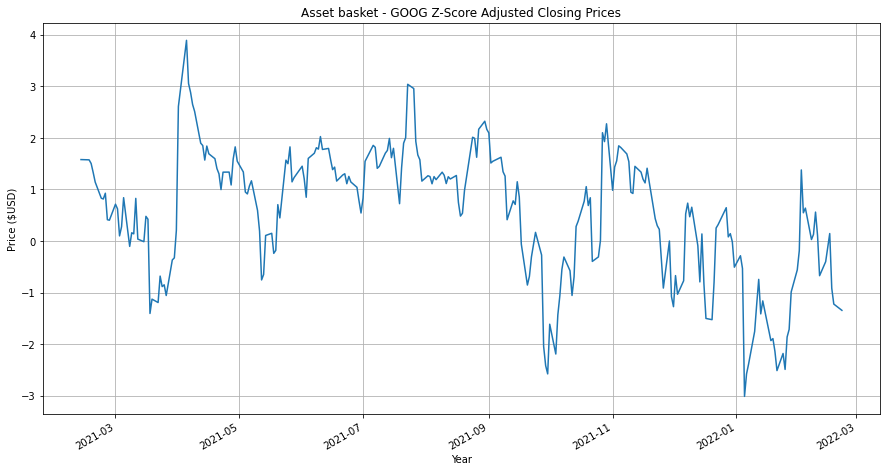

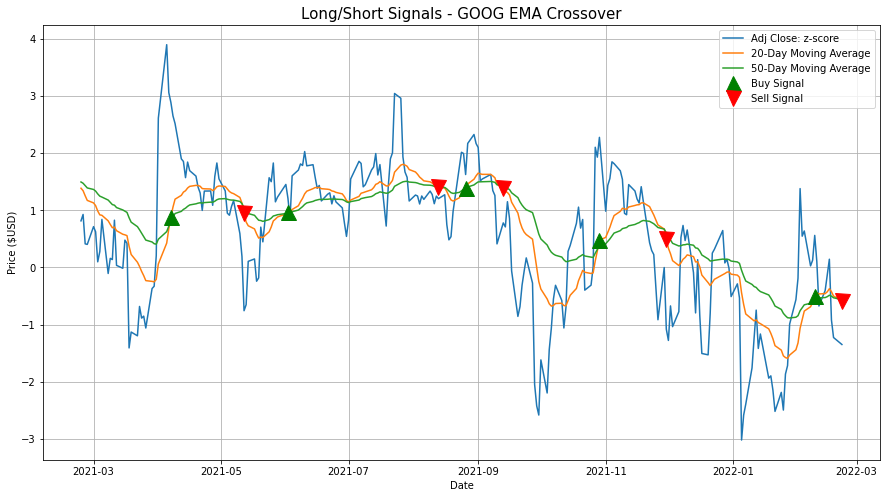

[*********************100%***********************]  1 of 1 completed


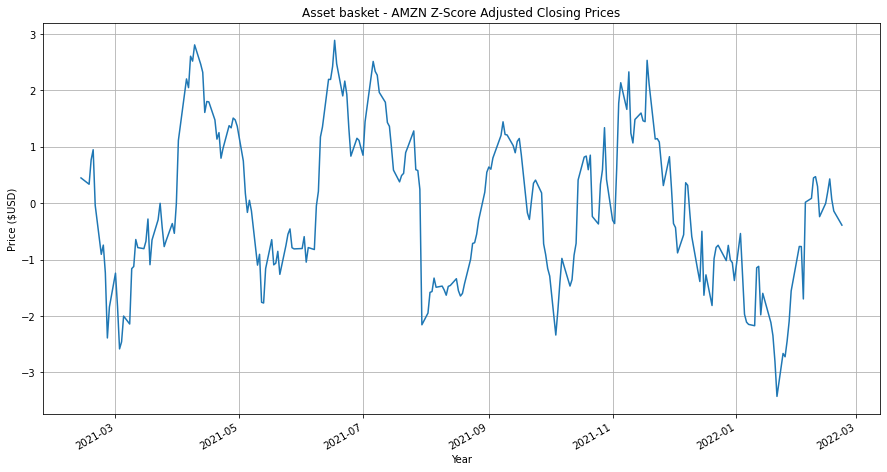

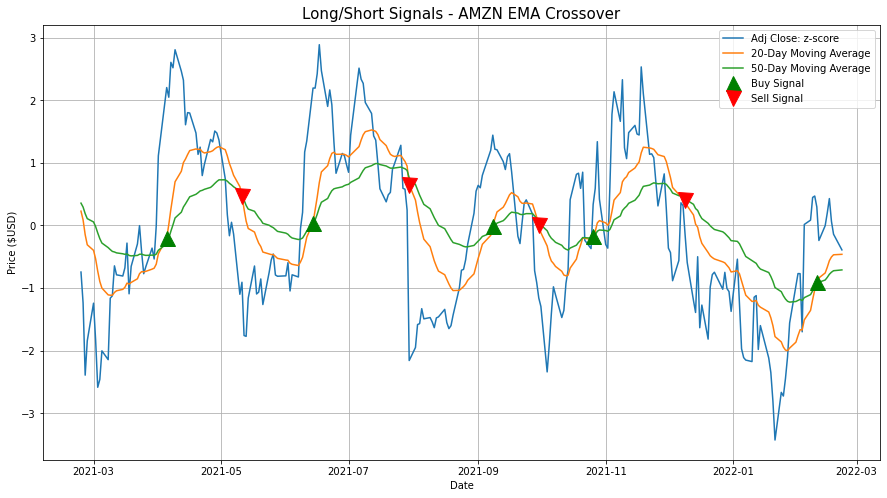

[*********************100%***********************]  1 of 1 completed


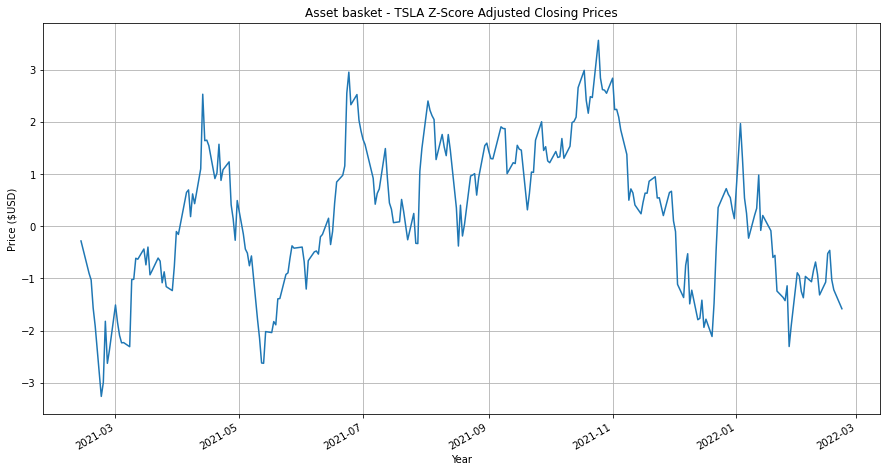

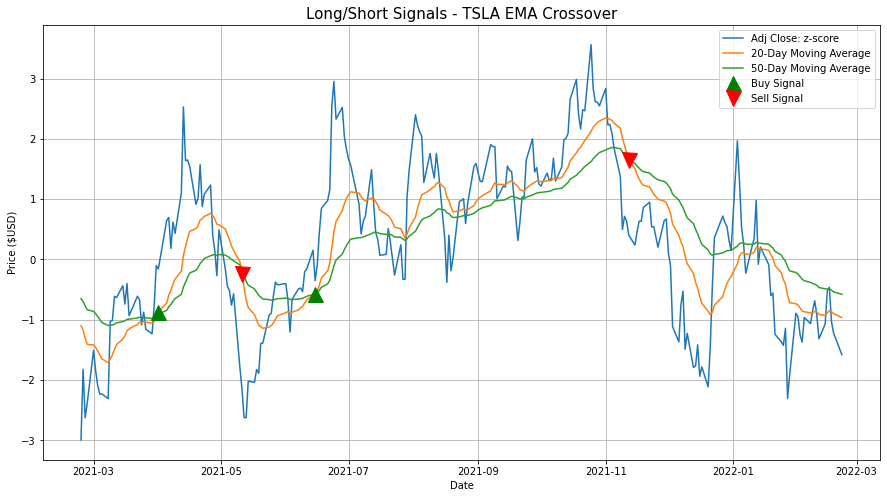

[*********************100%***********************]  1 of 1 completed


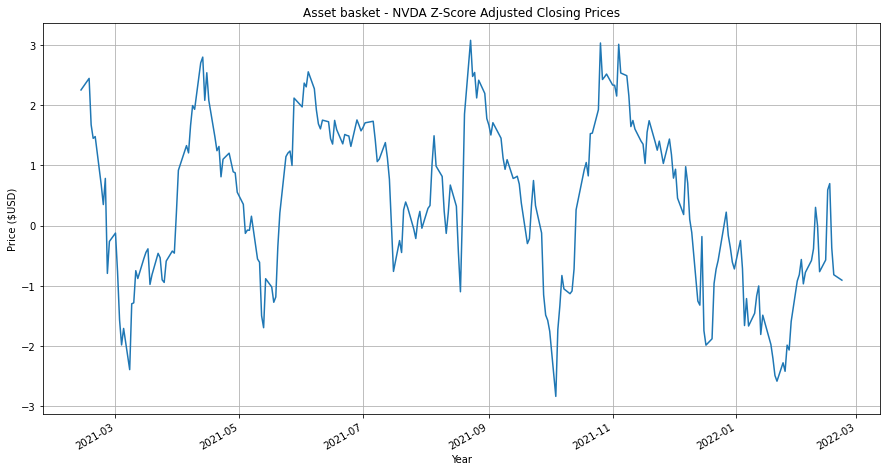

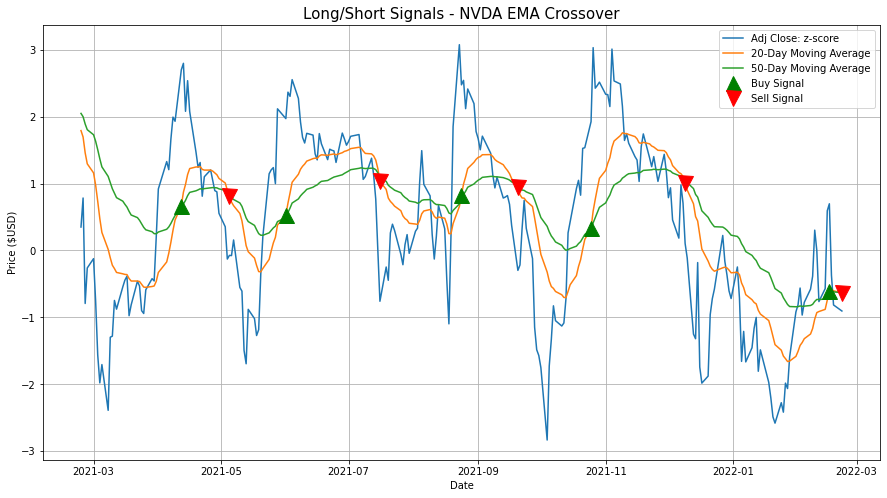

[*********************100%***********************]  1 of 1 completed


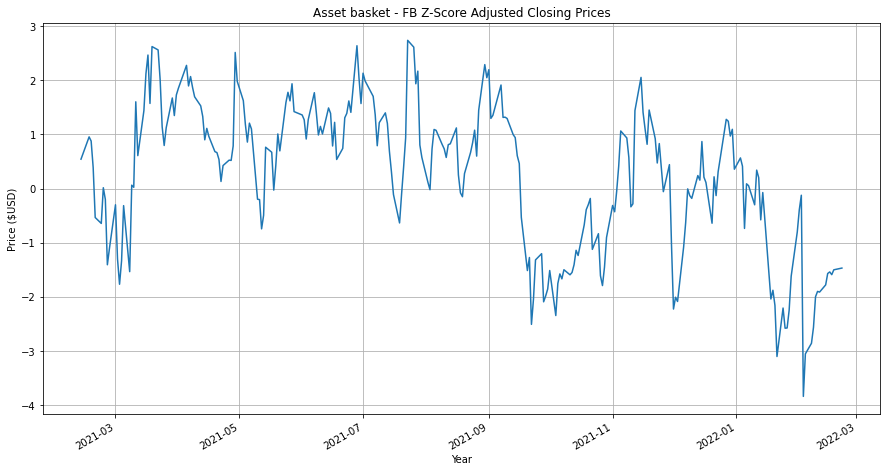

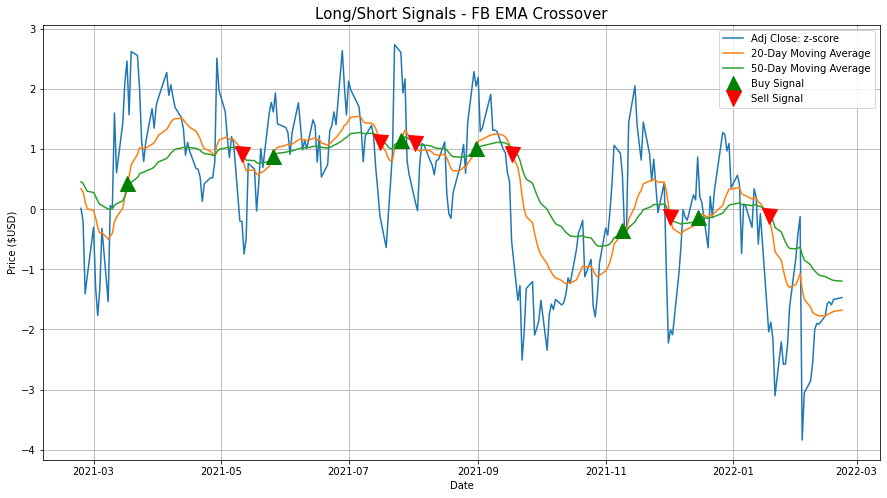

[*********************100%***********************]  1 of 1 completed


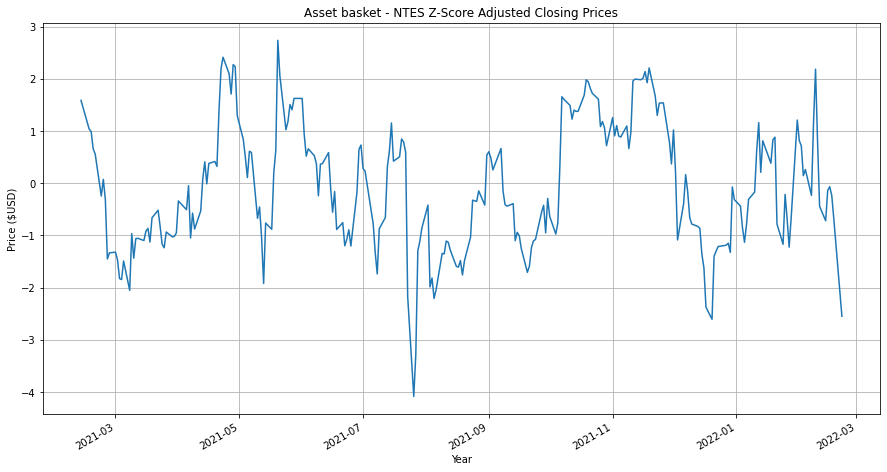

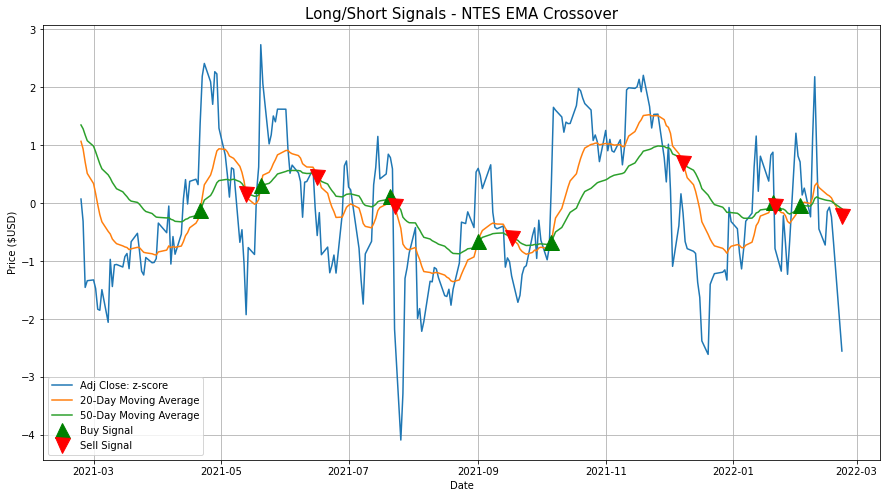

[*********************100%***********************]  1 of 1 completed


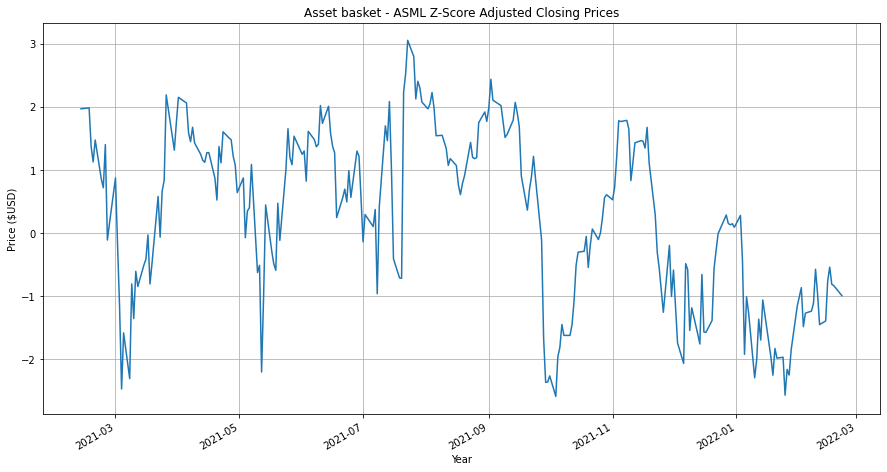

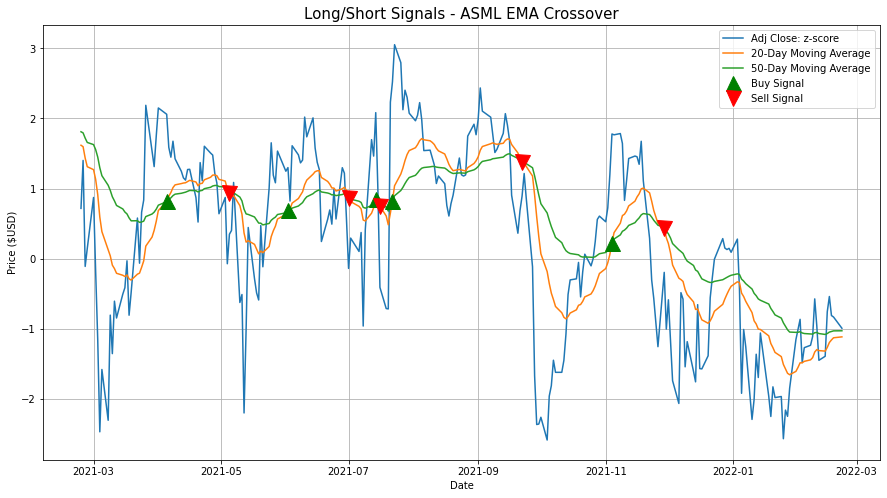

[*********************100%***********************]  1 of 1 completed


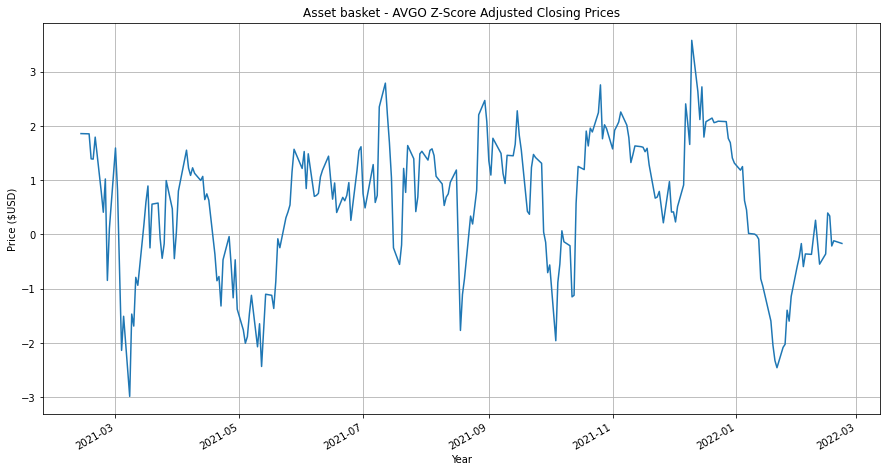

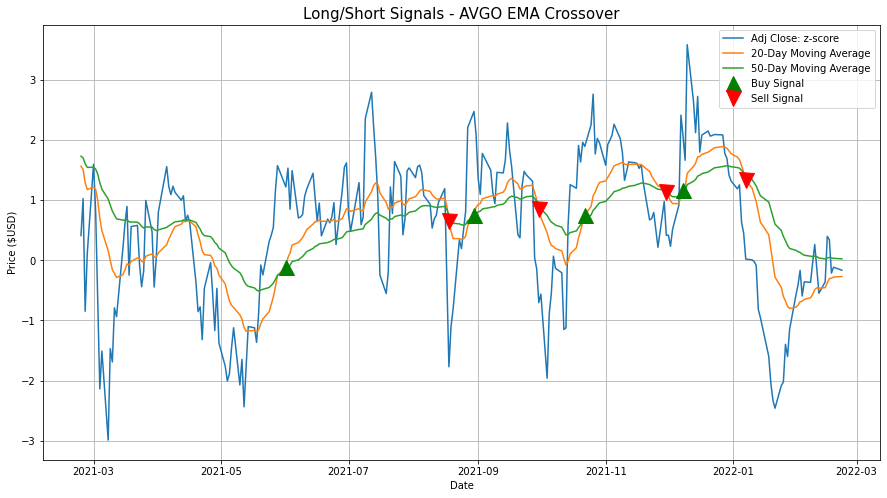

[*********************100%***********************]  1 of 1 completed


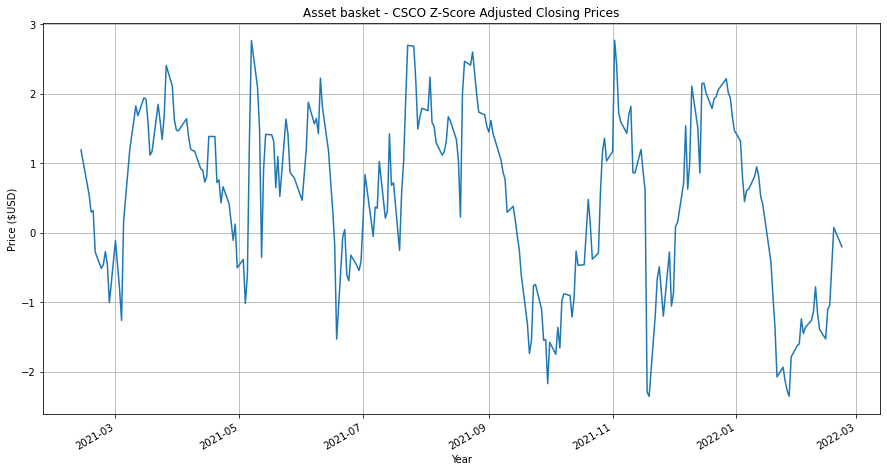

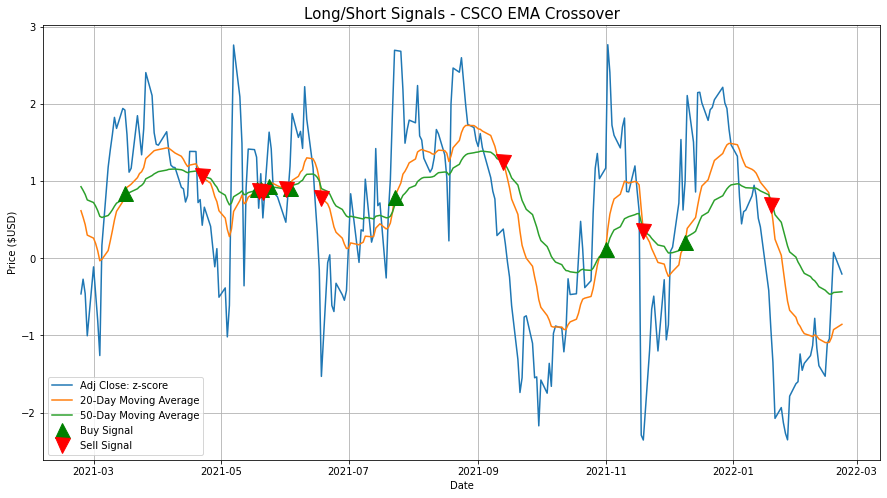

[*********************100%***********************]  1 of 1 completed


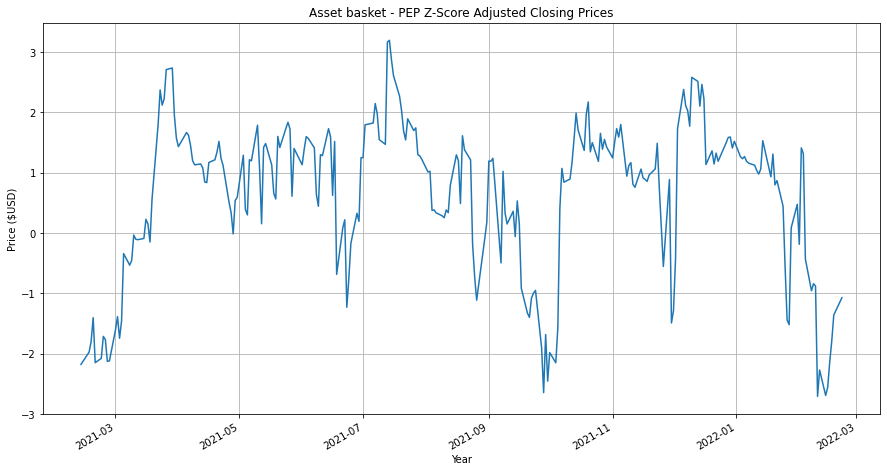

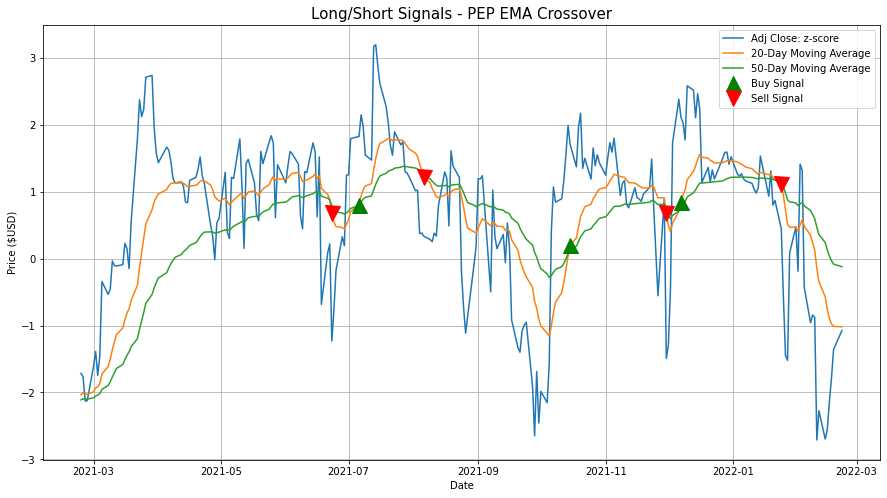

[*********************100%***********************]  1 of 1 completed


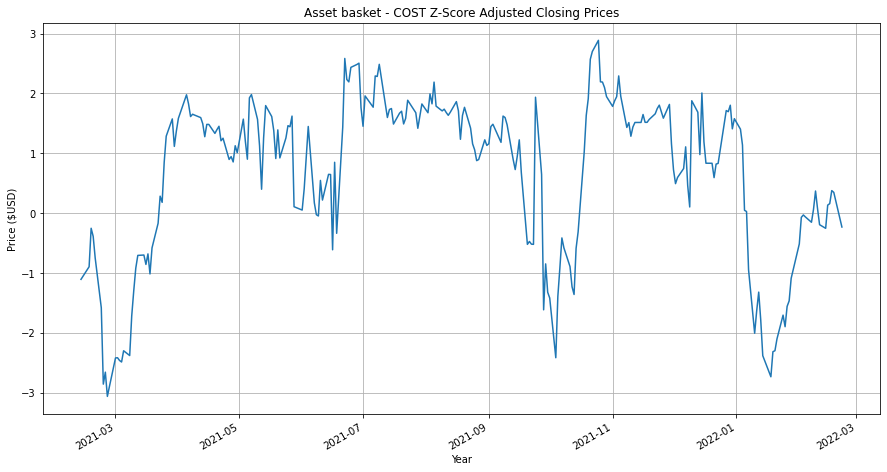

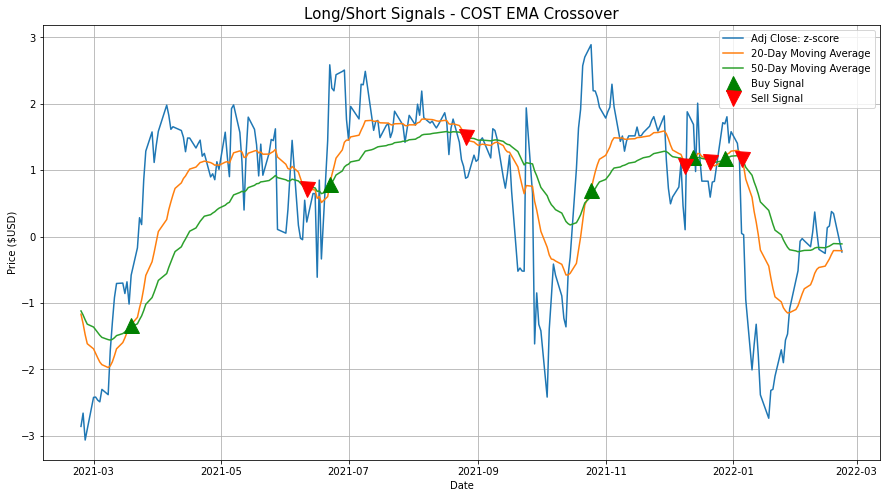

[*********************100%***********************]  1 of 1 completed


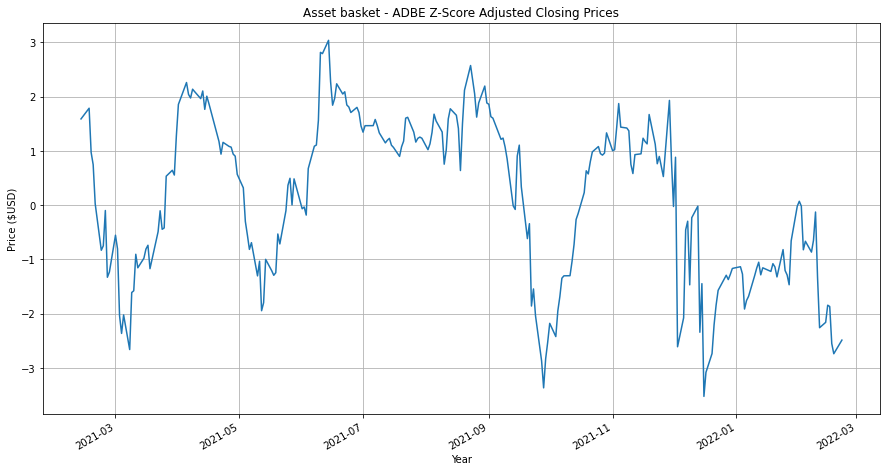

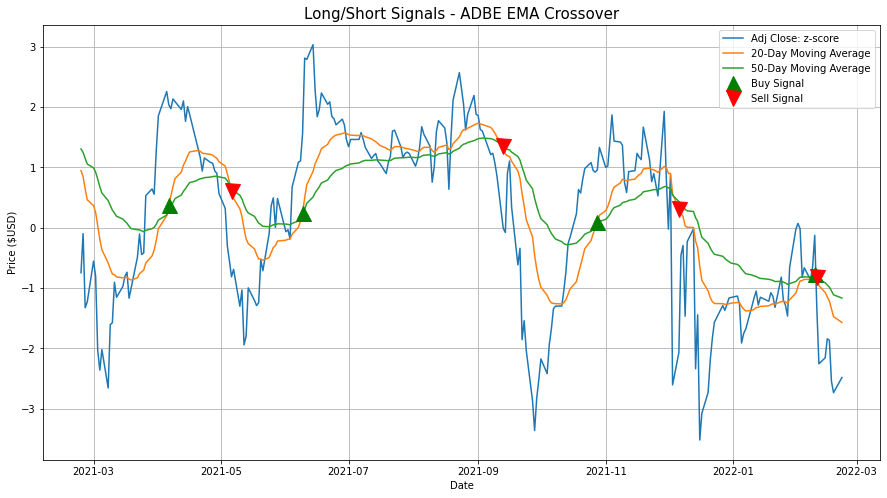

[*********************100%***********************]  1 of 1 completed


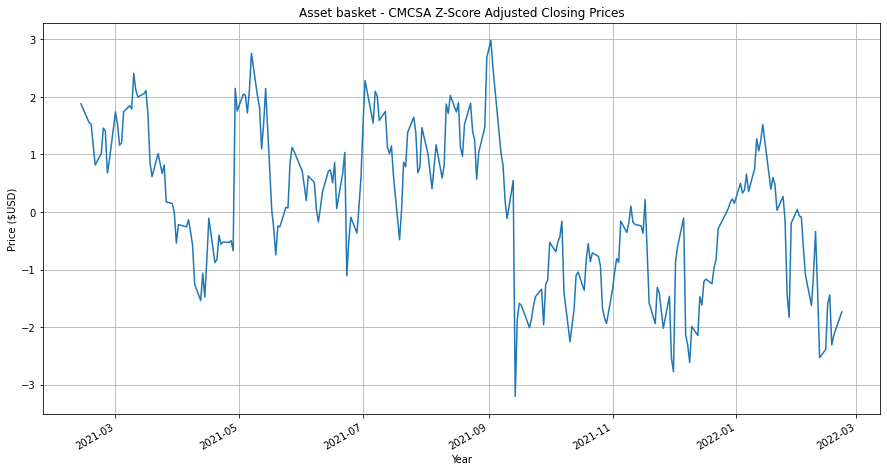

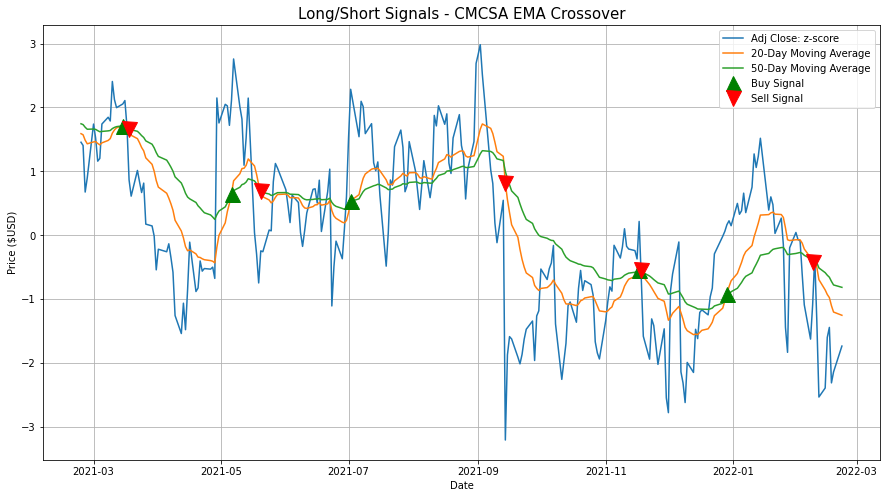

[*********************100%***********************]  1 of 1 completed


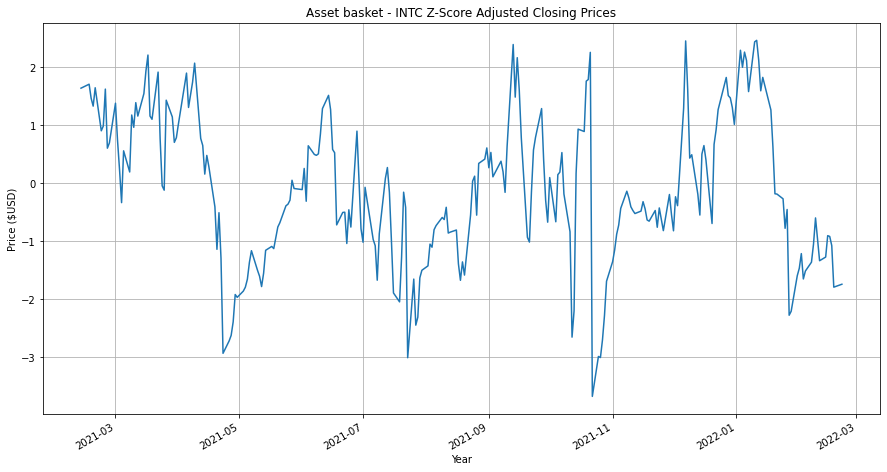

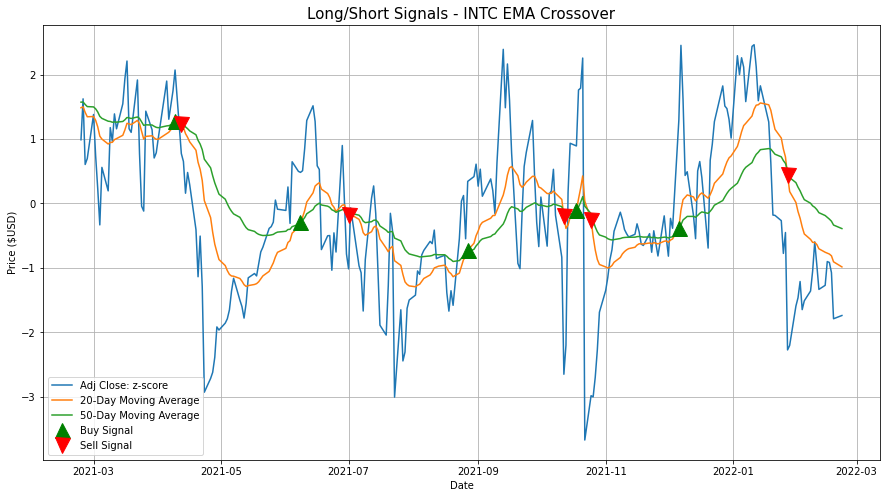

[*********************100%***********************]  1 of 1 completed


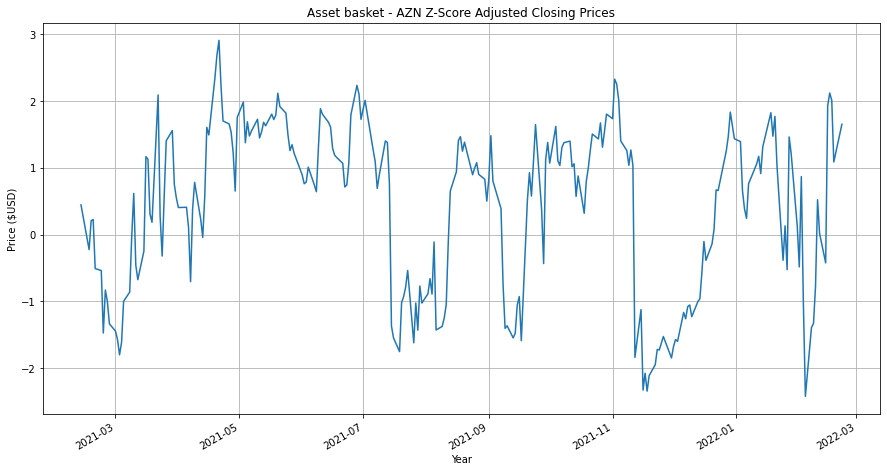

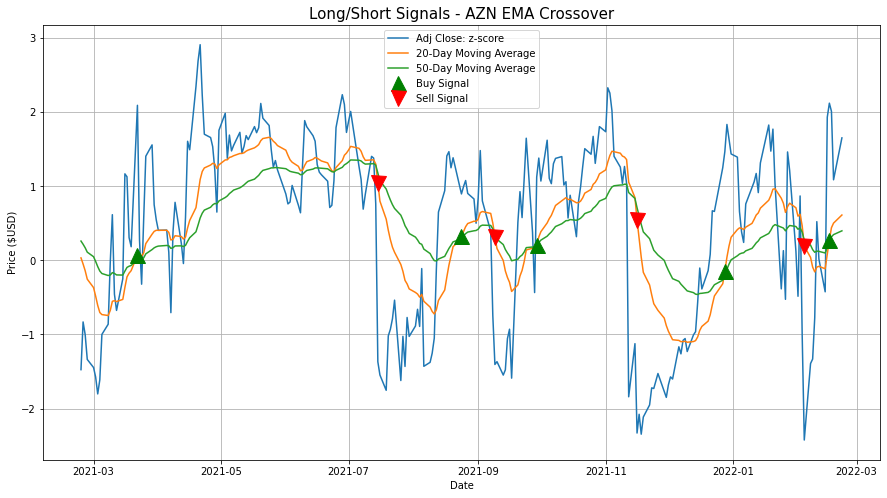

[*********************100%***********************]  1 of 1 completed


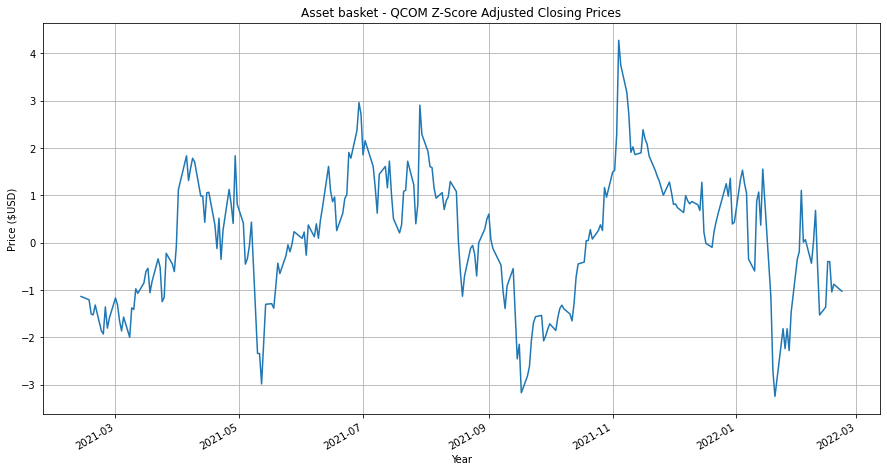

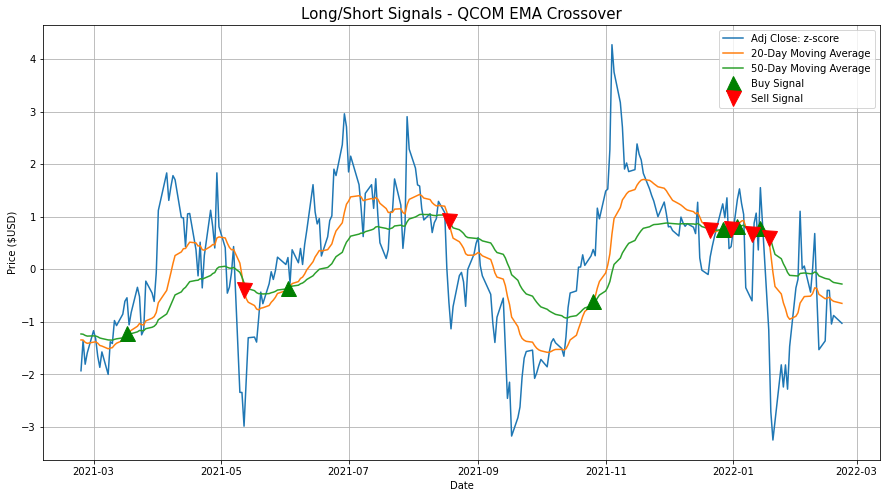

[*********************100%***********************]  1 of 1 completed


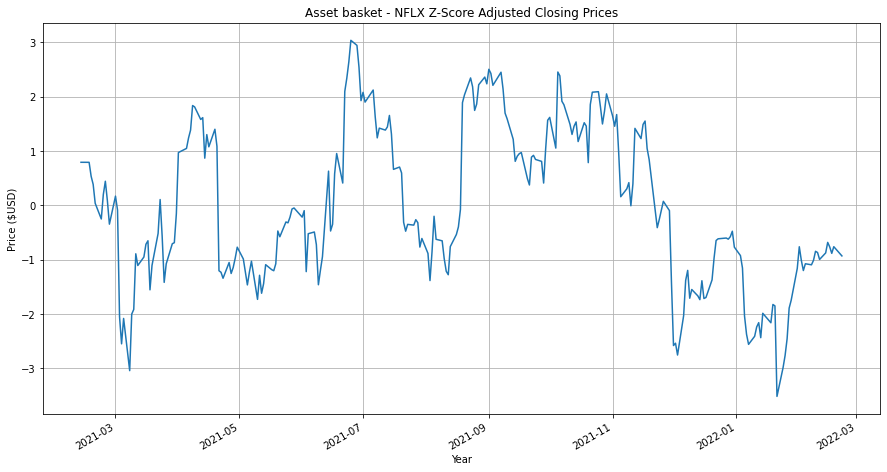

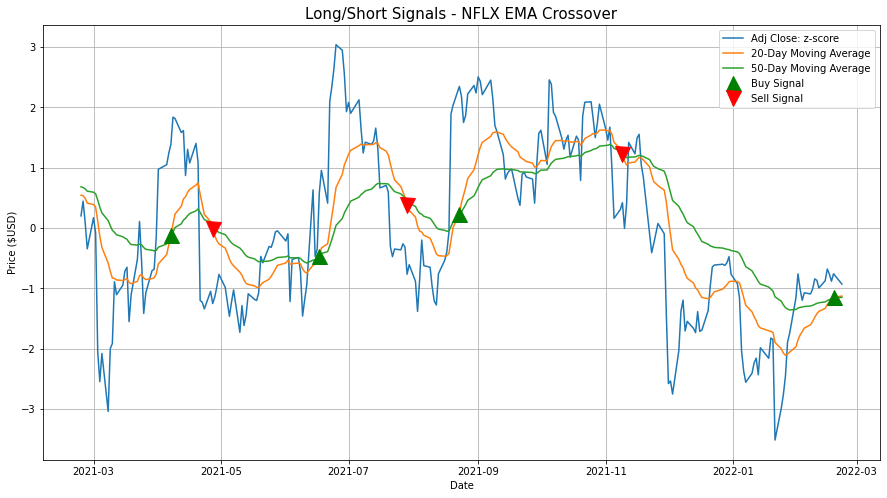

In [7]:
my_asset_basket = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'FB', 'NTES', 'ASML', 'AVGO', 'CSCO', 'PEP', 'COST', 'ADBE', 'CMCSA', 'INTC', 'AZN', 'QCOM', 'NFLX']

def MACD_Trend_Following_Strategy(stock_symbols = my_asset_basket, starting_date = dt.datetime(2018, 1, 1), ending_date = dt.datetime.now(), short_window = 20, long_window = 50, moving_average = 'EMA'):

    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on Yahoo finance. Eg: 'ULTRACEMCO.NS' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)

    zscore = 'Adj Close: z-score'

    for stock_symbol in stock_symbols:

        my_assets = yf.download(stock_symbol, interval='1d', start=start, end=end )

        #transform
        WINDOW = 30
        my_assets[zscore] = (my_assets['Adj Close'] - my_assets['Adj Close'].rolling(WINDOW).mean()) / my_assets['Adj Close'].rolling(WINDOW).std()
        
        my_assets[zscore].plot(figsize=(15,8))
        plt.title(f'Asset basket - {stock_symbol} Z-Score Adjusted Closing Prices')
        plt.ylabel('Price ($USD)')
        plt.xlabel('Year')
        plt.grid()
        plt.show();


        # column names for long and short moving average columns
        SHORT_WINDOW = str(short_window) + '_' + moving_average
        LONG_WINDOW = str(long_window) + '_' + moving_average

        if moving_average == 'SMA': # SMA component
            
            my_assets[SHORT_WINDOW] = my_assets[zscore].rolling(window= short_window, min_periods=1).mean()
            my_assets[LONG_WINDOW] = my_assets[zscore].rolling(window= long_window, min_periods=1).mean()

        
        elif moving_average == 'EMA': # EMA component

            my_assets[SHORT_WINDOW] = my_assets[zscore].ewm(span= short_window, adjust=False).mean()
            my_assets[LONG_WINDOW] = my_assets[zscore].ewm(span= long_window, adjust=False).mean()

        
        # create a new column 'Signal' such that if short-term moving average > than long-term moving average 
        # then set Signal as 1, or else set to 0.
        my_assets['Signal'] = 0 # neutral position
        my_assets['Long Signal'] = np.where(my_assets[SHORT_WINDOW] > my_assets[LONG_WINDOW], 1, 0)
        my_assets['Short Signal'] = np.where(my_assets[SHORT_WINDOW] < my_assets[LONG_WINDOW], -1, 0)


        # create a new column 'Position' which is a day-to-day difference of the 'Signal' column
        my_assets['Position'] = my_assets['Signal'].diff()

        
        # plot close price, short-term and long-term moving averages
        plot_my_assets = my_assets[-253:]

        # Touch up on figure 
        plt.figure(figsize=(15,8))
        plt.title(f'Long/Short Signals - {stock_symbol} {moving_average} Crossover', fontsize=15)
        plt.xlabel('Date')
        plt.ylabel('Price ($USD)')

        # plot legends
        plt.plot(plot_my_assets[zscore], label = zscore)
        plt.plot(plot_my_assets[SHORT_WINDOW], label='20-Day Moving Average')
        plt.plot(plot_my_assets[LONG_WINDOW], label='50-Day Moving Average')
        

        # Plot Long signals
        plt.plot(plot_my_assets[
                        (plot_my_assets['Long Signal'] == 1) &
                                (plot_my_assets['Long Signal'].shift(1) == 0)][SHORT_WINDOW], 
                                        '^', ms=15, label = 'Buy Signal', color = 'green')

        # Plot Short signals
        plt.plot(plot_my_assets[
                        (plot_my_assets['Short Signal'] == -1) &
                                (plot_my_assets['Short Signal'].shift(1) == 0)][SHORT_WINDOW], 
                                        'v', ms=15, label = 'Sell Signal', color = 'red')


        plt.legend()
        plt.grid()
        plt.show();

        # # ----------------------------------  Plotting Cumulative Returns  --------------------------


        # # Calculate daily returns
        # daily_ret = my_assets[zscore].pct_change()[1:]
        # # display(daily_ret)

        # # Calculate weighted returns (for a basket of assets) OR strategy returns (specific to the technical indicator you are using)
        # strategy_ret = daily_ret * my_assets['Position'].shift(1)
        # # display(strategy_ret)

        # #  Calculate sum of weighted returns (only for a basket of assets)
        # # port_ret = weighted_returns.sum(axis=1)

        # # Calculate cumulative returns
        #     # Cumulative returns formula  = (Total Amount at the end - Total Initial amount) / Total Initial Amount] * 100%
        # cumulative_ret = strategy_ret.add(1).cumprod()
        
        # # Plot cumulative returns
        # cumulative_ret.plot(figsize=(15, 8))
        # plt.title('Cumulative Returns')
        # plt.xlabel('Date')
        # plt.ylabel('Cumulative Returns')
        # plt.legend()
        # plt.grid()
        # plt.show();

# EXECUTE THE FUNCTION
MACD_Trend_Following_Strategy(my_asset_basket, '2012-03-01', '2022-03-01', 20, 50, 'EMA')


In [ ]:
def Cumulative_Returns(ticker = 'NFLX'):

    my_asset = yf.download(ticker, interval='1d', start=start, end=end )

    # Calculate daily returns
    daily_ret = my_asset[zscore].pct_change()[1:]
    # display(daily_ret)

    # Calculate weighted returns (for a basket of assets) OR strategy returns (specific to the technical indicator you are using)
    strategy_ret = daily_ret * my_asset['Position'].shift(1)
    # display(strategy_ret)

    #  Calculate sum of weighted returns (only for a basket of assets)
    # port_ret = weighted_returns.sum(axis=1)

    # Calculate cumulative returns
        # Cumulative returns formula  = (Total Amount at the end - Total Initial amount) / Total Initial Amount] * 100%
    cumulative_ret = strategy_ret.add(1).cumprod()
    
    # Plot cumulative returns
    cumulative_ret.plot(figsize=(12, 7))
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()
    plt.show();

Cumulative_Returns(ticker='NFLX')

### Next Checkpoint: How to chart multiple stocks/assets into a single line, i.e. indexify the basket of stocks

In [ ]:
data_list = ['AAPL', 'MSFT', 'GOOGL', 'GOOG', 'AMZN', 'TSLA', 'NVDA', 'FB', 'NTES', 'ASML', 'AVGO', 'CSCO', 'PEP', 'COST', 'ADBE', 'CMCSA', 'INTC', 'AZN', 'QCOM', 'NFLX']

price = yf.download(data_list, start='2012-05-19', end='2022-02-18')[zscore].round(2)
price

price.plot(figsize=(18,12))
plt.grid()
plt.show();

In [ ]:
price['average_price_top20'] = 0
price

for ticker in price:
    price['average_price_top20'] += price[ticker]/20

display(price)


indexed_price = price['average_price_top20']

indexed_price.plot(figsize=(18,12))
plt.title('Indexed Adjusted Closing Prices')
plt.ylabel('Price')
plt.grid()
plt.show();

### Portfolio Structuring - Z-Score/ Z-normalisation factor portfolio weighting

Comments:
- We realise that now some assets have a HIGHER price than most other assets, so that would unfairly affect the price of the index.
- Index also requires factor of 'weightage', and the best measn by which to identify the balance is by passing through transformational tools like a z-score test
    - this enables you to categorise them into standard deviations
- i.e. data needs to be normalised before making it a fair index

Intuition review:
- what this does is actually trading based on the PRICE
- what you can progress to do is to make signals based off derived data like divergence between any pair of assets

In [ ]:
TRANSFORM_WINDOW = 30
for c in data.columns:
    data[f'{c}_zscore'] = (data[f'{c}'] - data[f'{c}'].rolling(TRANSFORM_WINDOW).mean()) / data[f'{c}'].rolling(TRANSFORM_WINDOW).std()



### Final Component: Backtesting